In [1]:
# library importation 

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
st_words = stopwords.words('english')
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
# loading BBC news dataset.... 
data = pd.read_csv('bbc_text.csv')
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [3]:
row , column = data.shape
print('No of Datapoint (rows) : ',  row)
print('No of features  (columns) : ', column)
new_classes = data.category.unique()
classes_size = len(new_classes)
print("Label  Class: " , new_classes)

No of Datapoint (rows) :  2225
No of features  (columns) :  2
Label  Class:  ['tech' 'business' 'sport' 'entertainment' 'politics']


[401, 510, 511, 386, 417]


<BarContainer object of 5 artists>

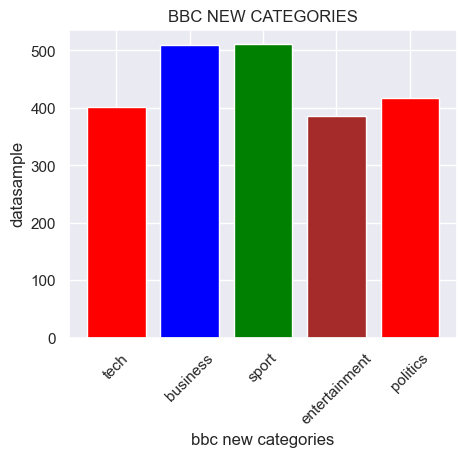

In [4]:
sn.set_theme()
len(data[data['category']== new_classes[0]])
class_len = []
for new_class in new_classes:
  ln = len(data[data['category']== new_class])
  class_len.append(ln)

class_len = np.array(class_len) 
print(list(class_len))

plt.figure(figsize=(5,4))

# visualizing the class label count
plt.xlabel('bbc new categories')
plt.ylabel('datasample')
plt.title('BBC NEW CATEGORIES')
plt.xticks(rotation=45)
plt.bar(new_classes, class_len, color=['red', 'blue', 'green', 'brown'])

In [4]:
lemmer = WordNetLemmatizer()


def dataset_cleaning(text):
    #  removeing punctuation from the dataset
    text = ''.join([token for token in text if not token in string.punctuation])
    token = word_tokenize(text)
    # removing stopword (words that had less meaning to the dataset)     
    text  = [t.lower() for t in token if not t in st_words ]
    text_lemma = [lemmer.lemmatize(t) for t in text]
    
    return text_lemma

data['lem_clean_text'] = data["text"].apply(lambda x: dataset_cleaning(x))

In [5]:
data.head(3)

,category,text,lem_clean_text
0,tech,tv future in the hands of viewers with home th...,"[tv, future, hand, viewer, home, theatre, syst..."
1,business,worldcom boss left books alone former worldc...,"[worldcom, bos, left, book, alone, former, wor..."
2,sport,tigers wary of farrell gamble leicester say ...,"[tiger, wary, farrell, gamble, leicester, say,..."


In [6]:
clean_data = data.drop(columns=['text'])
clean_data.head()

,category,lem_clean_text
0,tech,"[tv, future, hand, viewer, home, theatre, syst..."
1,business,"[worldcom, bos, left, book, alone, former, wor..."
2,sport,"[tiger, wary, farrell, gamble, leicester, say,..."
3,sport,"[yeading, face, newcastle, fa, cup, premiershi..."
4,entertainment,"[ocean, twelve, raid, box, office, ocean, twel..."


In [7]:
# creating a document version of the lemmatization

def return_doc(documents): 
    return ' '.join(documents)

clean_data['doc'] = clean_data['lem_clean_text'].apply(lambda x: return_doc(x))
clean_data.head(3)

,category,lem_clean_text,doc
0,tech,"[tv, future, hand, viewer, home, theatre, syst...",tv future hand viewer home theatre system plas...
1,business,"[worldcom, bos, left, book, alone, former, wor...",worldcom bos left book alone former worldcom b...
2,sport,"[tiger, wary, farrell, gamble, leicester, say,...",tiger wary farrell gamble leicester say rushed...


In [9]:

# Train Word2Vec model (extract semantic relationship)............................
# w2v_model = Word2Vec(sentences=tokenized_docs, vector_size=20, window=5, min_count=1, workers=4)


In [12]:
from gensim.models import KeyedVectors

# Load Google News Word2Vec model
model_path = 'GoogleNews-vectors-negative300.bin.gz'
google_w2vec = KeyedVectors.load_word2vec_format(model_path, binary=True)
google_w2vec

In [13]:
clean_data.head(2)

,category,lem_clean_text,doc
0,tech,"[tv, future, hand, viewer, home, theatre, syst...",tv future hand viewer home theatre system plas...
1,business,"[worldcom, bos, left, book, alone, former, wor...",worldcom bos left book alone former worldcom b...


In [14]:
# Train Word2Vec model (extract semantic relationship)............................
w2v_model = Word2Vec(sentences=clean_data.lem_clean_text, vector_size=300, window=5, min_count=1, workers=4)
w2v_model

In [15]:
w2v_model.wv.most_similar('soccer')

[('inaccurate', 0.996984601020813),
 ('thompson', 0.996805727481842),
 ('exclusive', 0.9962727427482605),
 ('hiding', 0.9960120320320129),
 ('agent', 0.9955757260322571),
 ('afi', 0.9952898025512695),
 ('nielsen', 0.9951372146606445),
 ('clark', 0.994857907295227),
 ('concentrate', 0.9947973489761353),
 ('tate', 0.9946526885032654)]

In [16]:
# update local word embedding

# using this method to copy remove embedding to local BBC news word embedding .
def copy_sementic_similarity(local_w2v, google_w2v):
    for word in local_w2v.wv.key_to_index:
        if word in google_w2v:
            local_w2v.wv[word] = google_w2v[word]
     

copy_sementic_similarity(w2v_model, google_w2vec)

In [17]:
google_w2vec.most_similar('football', topn=1)

[('soccer', 0.731354832649231)]

In [18]:
google_w2vec.most_similar('is', topn=1)

[('was', 0.6549733281135559)]

In [19]:
google_w2vec.most_similar('is', topn=1)[0][0]

'was'

In [20]:
w2v_model.wv.most_similar('football')

[('golfer', 30.17795181274414),
 ('rucking', 27.467243194580078),
 ('reffed', 26.46592140197754),
 ('collegiate', 26.366870880126953),
 ('gaffer', 26.330381393432617),
 ('athleticism', 26.26714515686035),
 ('wrestling', 25.608854293823242),
 ('academically', 23.129676818847656),
 ('sectarian', 20.877944946289062),
 ('outfield', 20.72921371459961)]

In [21]:
w2v_model.wv.most_similar('soccer')

[('golfer', 28.269420623779297),
 ('curling', 26.524885177612305),
 ('collegiate', 24.688154220581055),
 ('wrestling', 24.039894104003906),
 ('sportswear', 24.03070831298828),
 ('reffed', 20.88397979736328),
 ('nordic', 18.808439254760742),
 ('outfield', 18.40839958190918),
 ('athleticism', 18.107986450195312),
 ('pom', 17.91547966003418)]

In [22]:
clean_data.head(2)

,category,lem_clean_text,doc
0,tech,"[tv, future, hand, viewer, home, theatre, syst...",tv future hand viewer home theatre system plas...
1,business,"[worldcom, bos, left, book, alone, former, wor...",worldcom bos left book alone former worldcom b...


In [23]:
unique_val = clean_data.category.value_counts().to_dict()
unique_val

{'sport': 511,
 'business': 510,
 'politics': 417,
 'tech': 401,
 'entertainment': 386}

In [24]:
def get_aug_sample_size(unique_val_dict): 
    aug_size={}
    for key, val in unique_val_dict.items(): 
        aug_size[key] = 511-val
    
    return aug_size

aug_size = get_aug_sample_size(unique_val)
aug_size

{'sport': 0, 'business': 1, 'politics': 94, 'tech': 110, 'entertainment': 125}

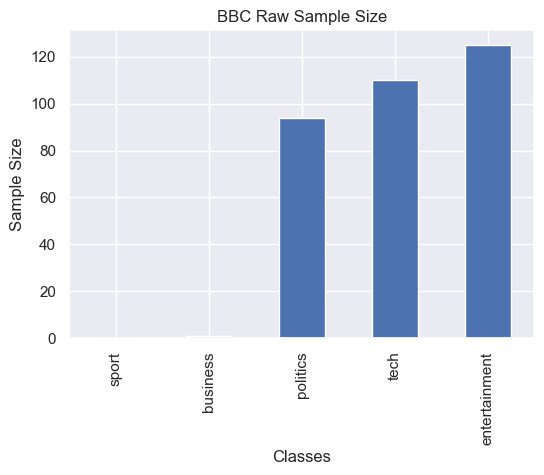

In [27]:
sn.set_theme()
plt.figure(figsize=(6,4))
pd.Series(aug_size).plot(kind='bar')
plt.title('BBC Raw Sample Size')
plt.ylabel('Sample Size')
plt.xlabel('Classes')
plt.show()

In [28]:
# word_similarity_aug_data():
semi_data = clean_data.drop(columns=['doc'])

In [29]:
## extract onriginal sample
aug_list  = {}
for classes, count in aug_size.items(): 
    sample = semi_data[semi_data.category == classes].sample(count)
    # pd_list.append(sample)
    print(f'Generating {count} aug data for {classes} for bussiness class... ')
    
    # aug_list[classes] = [ [google_w2vec.most_similar(d, topn=1)[0][0] for d in doc] for doc in sample.lem_clean_text]
    document_list = []
    for doc in sample.lem_clean_text: 
        doc_list = []
        for d in doc:
            try:
                similar_word = w2v_model.most_similar(d, topn=1)[0][0]
                # append the top semantic similarity word......
                doc_list.append(similar_word)
            except Exception as e: 
                # append the orginal word
                doc_list.append(d)
            
        
        document_list.append(doc_list)

        aug_list[classes] = document_list        
    print('operation complete... ')


Generating 0 aug data for sport for bussiness class... 
operation complete... 
Generating 1 aug data for business for bussiness class... 
operation complete... 
Generating 94 aug data for politics for bussiness class... 
operation complete... 
Generating 110 aug data for tech for bussiness class... 
operation complete... 
Generating 125 aug data for entertainment for bussiness class... 
operation complete... 


In [33]:
# pd.DataFrame(aug_list)
pd_list = []
for key, val in aug_list.items(): 
    aug_df = pd.DataFrame({'category': [key]*len(val) , 'doc': val})
    pd_list.append(aug_df)

final_aug_df = pd.concat(pd_list)
final_aug_df.head()
    

,category,doc
0,business,"[asian, quake, hit, european, share, share, eu..."
0,politics,"[uk, plan, deport, terror, suspect, deal, soug..."
1,politics,"[eu, referendum, could, cost, £80m, could, cos..."
2,politics,"[hatfield, executive, go, trial, engineering, ..."
3,politics,"[clarke, unveil, immigration, plan, new, contr..."


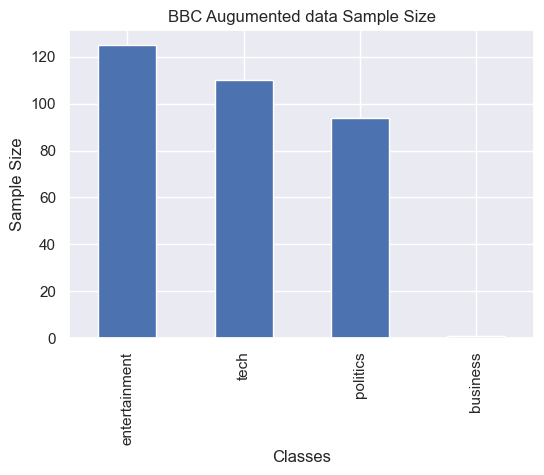

In [34]:
plt.figure(figsize=(6,4))
final_aug_df.category.value_counts().plot(kind='bar')
plt.title('BBC Augumented data Sample Size')
plt.ylabel('Sample Size')
plt.xlabel('Classes')
plt.show()

In [35]:
semi_data.rename(columns={'lem_clean_text': 'doc'}, inplace=True)

In [36]:
balanced_df = pd.concat([semi_data, final_aug_df])
balanced_df.head()

,category,doc
0,tech,"[tv, future, hand, viewer, home, theatre, syst..."
1,business,"[worldcom, bos, left, book, alone, former, wor..."
2,sport,"[tiger, wary, farrell, gamble, leicester, say,..."
3,sport,"[yeading, face, newcastle, fa, cup, premiershi..."
4,entertainment,"[ocean, twelve, raid, box, office, ocean, twel..."


<Axes: >

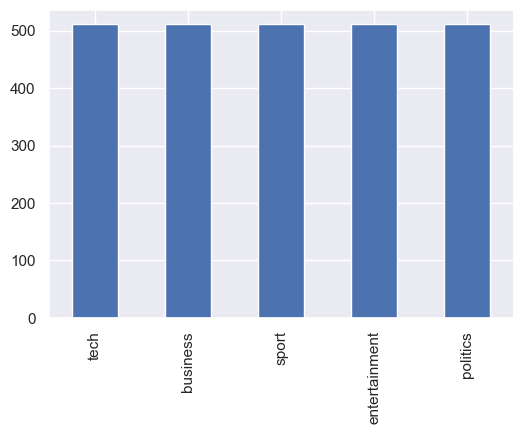

In [37]:
plt.figure(figsize=(6,4))
balanced_df.category.value_counts().plot(kind='bar')

In [38]:
# sample = semi_data[semi_data.category == 'tech'].sample(3)
# sample

# aug_sample = [ [d.upper() for d in doc] for doc in sample.lem_clean_text]
# pd.DataFrame({'category': ['tech']*3 , 'doc': aug_sample})


# one = pd.DataFrame({'category': ['tech']*3 , 'doc': aug_sample})
# two = pd.DataFrame({'category': ['tech']*3 , 'doc': aug_sample})

# pd.concat([one, two], axis=0) 

In [39]:
# creating a document version of the lemmatization
def return_doc(documents): 
    return ' '.join(documents)

balanced_df['documents'] = balanced_df['doc'].apply(lambda x: return_doc(x))
balanced_df.head(3)

,category,doc,documents
0,tech,"[tv, future, hand, viewer, home, theatre, syst...",tv future hand viewer home theatre system plas...
1,business,"[worldcom, bos, left, book, alone, former, wor...",worldcom bos left book alone former worldcom b...
2,sport,"[tiger, wary, farrell, gamble, leicester, say,...",tiger wary farrell gamble leicester say rushed...


In [40]:
# extracting the doc from data fram ........
documents = balanced_df['documents']
documents

0      tv future hand viewer home theatre system plas...
1      worldcom bos left book alone former worldcom b...
2      tiger wary farrell gamble leicester say rushed...
3      yeading face newcastle fa cup premiership side...
4      ocean twelve raid box office ocean twelve crim...
                             ...                        
120    memory marley mark 60th anniversary birth regg...
121    comic book genius stan lee stan lee man respon...
122    belle named best scottish band belle sebastian...
123    dance music dead say fatboy dj norman cook aka...
124    scissor sister triumph brit u band scissor sis...
Name: documents, Length: 2555, dtype: object

In [41]:
# Tokenize documents
# tokenized_docs = [word_tokenize(doc.lower()) for doc in documents]
tokenized_docs = balanced_df['doc']

In [42]:
# Compute TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

In [43]:
# Train Word2Vec model (extract semantic relationship)............................
word_embedding = Word2Vec(sentences=tokenized_docs, vector_size=300, window=5, min_count=1, workers=4)
word_embedding.wv['euro']

array([ 3.23000580e-01,  4.14261639e-01,  2.14073122e-01,  2.13265106e-01,
       -1.28032546e-02, -1.45574883e-01,  1.00851387e-01,  1.01465583e+00,
        2.32599109e-01,  3.70950729e-01, -9.46534351e-02, -4.57834721e-01,
        1.86709091e-01,  2.46838912e-01, -4.83817607e-01, -1.88477814e-01,
        7.84577012e-01, -3.01980019e-01,  1.32847592e-01,  2.12796181e-01,
       -4.47954237e-01, -2.71046199e-02,  3.57003599e-01,  3.49157490e-02,
        5.82664669e-01,  9.41681862e-02, -4.68038559e-01, -1.60857394e-01,
       -2.01531067e-01, -5.51291108e-01,  2.26009145e-01,  1.62829369e-01,
       -2.31572576e-02, -8.11328590e-02, -9.10583809e-02,  1.13158271e-01,
       -2.47061029e-02, -3.53341073e-01, -2.08819300e-01, -1.41121551e-01,
       -1.71137671e-03,  6.65740907e-01,  4.41422582e-01, -4.71257091e-01,
        2.14158371e-01,  1.10163912e-01, -1.00258604e-01,  6.91455364e-01,
       -3.71995538e-01,  2.95915008e-01, -1.00203067e-01,  1.05884939e-01,
       -1.01113260e+00, -

In [50]:
tfidf_matrix.shape

(2555, 29599)

In [51]:
balanced_df.category = balanced_df.category.astype('category')
encoded_lbl = balanced_df.category.cat.codes
balanced_df.category.unique()

['tech', 'business', 'sport', 'entertainment', 'politics']
Categories (5, object): ['business', 'entertainment', 'politics', 'sport', 'tech']

In [52]:
balanced_df['lbl'] = encoded_lbl
balanced_df[['category', 'lbl']]

,category,lbl
0,tech,4
1,business,0
2,sport,3
3,sport,3
4,entertainment,1
...,...,...
120,entertainment,1
121,entertainment,1
122,entertainment,1
123,entertainment,1


In [53]:
label_encode =  dict(zip( balanced_df.category.unique() , encoded_lbl.unique() ))
label_encode

{'tech': 4, 'business': 0, 'sport': 3, 'entertainment': 1, 'politics': 2}

In [54]:
X = tfidf_matrix.toarray()
X

array([[0.        , 0.01929646, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02341527, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0371215 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00443929, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [56]:
y = balanced_df.lbl
print(y[:10])

0    4
1    0
2    3
3    3
4    1
5    2
6    2
7    3
8    3
9    1
Name: lbl, dtype: int8


In [57]:
tfidf_X_train, tfidf_X_test, tfidf_y_train, tfidf_y_test = train_test_split(X, y , test_size=0.2, stratify=y, random_state=42)

In [58]:
# tfidf_X_train

In [ ]:
# ploty graph 
def plot_metric_graph(model, title):
    acc  = model.history.history['accuracy']
    loss = model.history.history['loss']
    val_acc  = model.history.history['val_accuracy']
    val_loss = model.history.history['val_loss']
    plt.figure(figsize=(4,4))
    plt.plot(acc)
    plt.plot(loss)
    plt.plot(val_acc)
    plt.plot(val_loss)
    plt.legend(labels=['acc', 'loss', 'val_acc', 'val_loss'])
    plt.ylabel('Accuracy/Loss')
    plt.xlabel('Epoch')
    plt.title(title)
    plt.grid(visible=True, linestyle='--', linewidth=0.5)
    plt.show()

### TFIDF + LSTM

In [116]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Embedding, Input, GlobalAveragePooling1D, Multiply, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define parameters
max_length = 50
vocab_size = 10000 
embedding_dim = 128
num_classes = 5

# Input layer
inputs = Input(shape=(max_length,))
# Embedding layer
embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(inputs)
# LSTM layer
lstm = LSTM(64, return_sequences=True)(embedding)
# Attention mechanism 
attention = Dense(1, activation='tanh')(lstm)
attention_weights = Activation('softmax')(attention)
context_vector = Multiply()([lstm, attention_weights])
# Global average pooling to reduce dimensions
pooled = GlobalAveragePooling1D()(context_vector)
# Fully connected layers
dense1 = Dense(32, activation='relu')(pooled)
outputs = Dense(num_classes, activation='sigmoid')(dense1)
# Define Model
lstmmodel = Model(inputs=inputs, outputs=outputs)
# model compilation... 
lstmmodel.compile(optimizer=Adam(learning_rate=0.008),
                                   loss='sparse_categorical_crossentropy',
                                   metrics=['accuracy'])
# Model Summary
lstmmodel.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 50, 128)      1280000     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    (None, 50, 64)       49408       ['embedding[0][0]']              
                                                                                                  
 dense_28 (Dense)               (None, 50, 1)        65          ['lstm[0][0]']                   
                                                                                              

In [118]:
tfidf_X_train.shape

(2044, 29599)

In [140]:
# LSTM TFIDF... 


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the ANN model
ann_tfidf_model = Sequential([
    Dense(64, activation='relu', input_shape=(29599,)),
    Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(5, activation='sigmoid')  # 5-class output
])

# Compile the model
ann_tfidf_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
ann_tfidf_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 64)                1894400   
                                                                 
 dense_60 (Dense)            (None, 32)                2080      
                                                                 
 dropout_14 (Dropout)        (None, 32)                0         
                                                                 
 dense_61 (Dense)            (None, 16)                528       
                                                                 
 dense_62 (Dense)            (None, 5)                 85        
                                                                 
Total params: 1,897,093
Trainable params: 1,897,093
Non-trainable params: 0
_________________________________________________________________


In [141]:
ann_tfidf_model.fit(tfidf_X_train, tfidf_y_train,validation_data=(tfidf_X_test, tfidf_y_test) , epochs=10)

Epoch 1/10
64/64 [==============================] - 4s 42ms/step - loss: 1.4530 - accuracy: 0.3072 - val_loss: 1.0642 - val_accuracy: 0.8415
Epoch 2/10
64/64 [==============================] - 2s 33ms/step - loss: 0.7034 - accuracy: 0.8425 - val_loss: 0.2338 - val_accuracy: 0.9863
Epoch 3/10
64/64 [==============================] - 2s 32ms/step - loss: 0.1941 - accuracy: 0.9687 - val_loss: 0.0649 - val_accuracy: 0.9941
Epoch 4/10
64/64 [==============================] - 2s 32ms/step - loss: 0.0935 - accuracy: 0.9814 - val_loss: 0.0390 - val_accuracy: 0.9941
Epoch 5/10
64/64 [==============================] - 2s 28ms/step - loss: 0.0603 - accuracy: 0.9878 - val_loss: 0.0291 - val_accuracy: 0.9922
Epoch 6/10
64/64 [==============================] - 2s 28ms/step - loss: 0.0477 - accuracy: 0.9883 - val_loss: 0.0225 - val_accuracy: 0.9941
Epoch 7/10
64/64 [==============================] - 2s 29ms/step - loss: 0.0353 - accuracy: 0.9927 - val_loss: 0.0199 - val_accuracy: 0.9961
Epoch 8/10
64

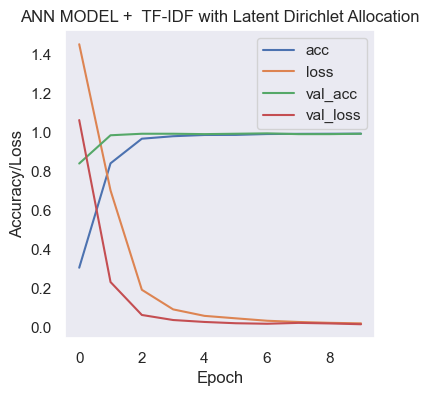

In [142]:
plot_metric_graph(ann_tfidf_model, 'ANN MODEL +  TF-IDF with Latent Dirichlet Allocation')


In [143]:
# classification report and metrics
from sklearn import metrics
# import numpy as np

result = ann_tfidf_model.predict(tfidf_X_test)
prediction = [np.argmax(res) for res in result]
class_report = metrics.classification_report(tfidf_y_test, prediction)
print(class_report)

ann_tfidf_result = {
    'accuracy':accuracy_score(tfidf_y_test, prediction), 
    'precision':precision_score(tfidf_y_test, prediction, average='weighted'),
    'recall': recall_score(tfidf_y_test, prediction,  average='weighted'), 
    'f1-score': f1_score(tfidf_y_test, prediction,  average='weighted')
}



ann_tfidf_df = pd.DataFrame(pd.Series(ann_tfidf_result))
ann_tfidf_df

16/16 [==============================] - 1s 16ms/step
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       102
           1       0.99      1.00      1.00       102
           2       0.99      1.00      1.00       102
           3       1.00      1.00      1.00       103
           4       0.99      1.00      1.00       102

    accuracy                           0.99       511
   macro avg       0.99      0.99      0.99       511
weighted avg       0.99      0.99      0.99       511



,0
accuracy,0.994129
precision,0.994186
recall,0.994129
f1-score,0.994100


### TF-IDF WORD EMBEDDING..

In [68]:
# TF-IDF WORD EMBEDDING.. 
# Create a dictionary of word TF-IDF scores
tfidf_dict = {word: tfidf_matrix[:, idx].sum() for idx, word in enumerate(tfidf_feature_names)}

# Function to compute document vectors
def document_vector(doc):
    # Compute the weighted average Word2Vec vector of a document using TF-IDF
    vectors = []
    for word in doc:
        if word in word_embedding.wv and word in tfidf_dict:
            vectors.append(word_embedding.wv[word] * tfidf_dict[word])  # Weight Word2Vec by TF-IDF
    return np.mean(vectors, axis=0) if vectors else np.zeros(word_embedding.vector_size)

# Compute document vectors
doc_vectors = np.array([document_vector(doc) for doc in tokenized_docs])

# Convert to DataFrame
feature_table= pd.DataFrame(doc_vectors)

# Print the enhanced document representations
feature_table 

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-1.755161,3.561574,1.992529,0.251663,1.918269,-4.497376,2.258656,9.923306,2.019901,-1.058094,...,0.438773,5.928778,6.772615,1.711020,5.699353,8.092207,-0.508202,-0.383028,1.717439,-0.522663
1,-3.578303,10.795175,2.806122,-0.486685,2.951906,-4.382714,5.350203,8.767334,3.492256,-4.408043,...,2.857211,7.343844,4.068270,1.809203,5.899055,6.154522,0.338516,-4.486334,1.957936,-2.279919
2,-0.385509,5.325563,1.610206,2.392547,1.159784,-3.492412,2.955242,10.377478,0.971955,-1.116164,...,0.165864,5.726779,5.972920,0.635687,5.540711,4.615257,0.316136,-2.508201,2.823509,-1.125973
3,1.353219,1.234021,0.324089,1.331445,0.430038,-0.908113,1.629607,5.587162,0.061544,-0.700896,...,0.171093,2.380943,2.882847,-0.052428,1.999530,1.230684,-1.086574,-1.355043,2.270874,-0.260483
4,1.501655,2.037133,0.032328,0.659963,0.916611,-1.250248,2.544157,7.776366,0.603427,-0.588331,...,0.553398,3.344118,3.786427,-0.012420,2.139390,2.951715,-2.139867,-1.573542,2.798920,-0.018232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,1.511307,1.835427,0.343080,1.385119,0.898170,-2.051004,2.454599,9.735865,0.780373,-1.002081,...,0.197599,4.857189,5.158590,0.861937,4.608448,4.195498,-1.503560,-1.469116,3.724264,-0.889456
2551,0.491220,1.713701,0.867398,0.996631,0.782702,-1.596773,1.400933,6.053697,0.690545,0.007189,...,0.253840,2.871202,3.385164,0.051472,2.753409,3.133831,-0.647413,-0.998120,1.776401,-0.210523
2552,0.995124,3.352780,0.151251,1.400680,1.569394,-2.159167,4.109425,11.731060,0.271619,-2.488590,...,1.000093,5.921995,6.927087,-0.145411,4.201938,4.235826,-2.671289,-2.382593,5.059258,-0.719725
2553,-0.012549,4.588969,1.179536,1.112544,1.426153,-3.534091,3.716490,10.903426,1.152453,-1.286410,...,0.456100,5.841326,6.249114,0.779842,4.878362,5.609002,-1.204019,-1.519915,3.328197,-0.834243


In [69]:
import numpy as np
import pandas as pd

# Assume:
# word_embedding: trained Word2Vec model
# tfidf_vectorizer: fitted TfidfVectorizer
# tokenized_docs: list of tokenized documents

tfidf_matrix = tfidf_vectorizer.transform([' '.join(doc) for doc in tokenized_docs])  # sparse matrix
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_vocab_index = {word: idx for idx, word in enumerate(tfidf_feature_names)}

def document_vector(doc, doc_idx):
    vectors = []
    weights = []
    for word in doc:
        if word in word_embedding.wv and word in tfidf_vocab_index:
            idx = tfidf_vocab_index[word]
            weight = tfidf_matrix[doc_idx, idx]
            if weight > 0:
                vectors.append(word_embedding.wv[word])
                weights.append(weight)
    if vectors:
        vectors = np.array(vectors)
        weights = np.array(weights).reshape(-1, 1)
        weighted_avg = np.sum(vectors * weights, axis=0) / np.sum(weights)
        return weighted_avg
    else:
        return np.zeros(word_embedding.vector_size)

# Compute weighted average Word2Vec embeddings
doc_vectors_w2v = np.array([document_vector(doc, idx) for idx, doc in enumerate(tokenized_docs)])

# Convert sparse TF-IDF matrix to dense (if memory allows) or keep sparse for ML models that accept it
tfidf_dense = tfidf_matrix.toarray()

# Concatenate TF-IDF vectors with Word2Vec embeddings
final_features = np.hstack([tfidf_dense, doc_vectors_w2v])

# Create DataFrame with proper column names
tfidf_cols = list(tfidf_feature_names)
w2v_cols = [f'w2v_dim_{i}' for i in range(word_embedding.vector_size)]
all_cols = tfidf_cols + w2v_cols

feature_table = pd.DataFrame(final_features, columns=all_cols)

print(feature_table.shape)  # Should be (num_docs, num_features + embedding_size)
print(feature_table.head())


(2555, 29899)
    00       000  0001  000300  00051  000acre  000ayear  000bn  000m  000s  \
0  0.0  0.019296   0.0     0.0    0.0      0.0       0.0    0.0   0.0   0.0   
1  0.0  0.023415   0.0     0.0    0.0      0.0       0.0    0.0   0.0   0.0   
2  0.0  0.000000   0.0     0.0    0.0      0.0       0.0    0.0   0.0   0.0   
3  0.0  0.000000   0.0     0.0    0.0      0.0       0.0    0.0   0.0   0.0   
4  0.0  0.000000   0.0     0.0    0.0      0.0       0.0    0.0   0.0   0.0   

   ...  w2v_dim_290  w2v_dim_291  w2v_dim_292  w2v_dim_293  w2v_dim_294  \
0  ...     0.023730     0.411476     0.521088     0.154770     0.350894   
1  ...     0.158893     0.345879     0.291367     0.043842     0.269609   
2  ...     0.044027     0.297180     0.362814     0.012186     0.276958   
3  ...     0.052566     0.211775     0.280570    -0.012264     0.170581   
4  ...     0.072644     0.225427     0.301141    -0.021333     0.155527   

   w2v_dim_295  w2v_dim_296  w2v_dim_297  w2v_dim_298  w2v_d

In [70]:
feature_table.to_numpy()

array([[ 0.        ,  0.01929646,  0.        , ...,  0.00703424,
         0.14236904,  0.01372144],
       [ 0.        ,  0.02341527,  0.        , ..., -0.2040796 ,
         0.12598369, -0.09108598],
       [ 0.        ,  0.        ,  0.        , ..., -0.16215086,
         0.19657937, -0.04002529],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.20616092,
         0.33858409, -0.03160669],
       [ 0.        ,  0.0371215 ,  0.        , ..., -0.0955885 ,
         0.21306946, -0.00821949],
       [ 0.        ,  0.00443929,  0.        , ..., -0.21477298,
         0.60944205, -0.02551194]])

In [ ]:
# from sklearn.decomposition import PCA
# import pandas as pd


# pca = PCA(n_components=32895 )
# reduced_features = pca.fit_transform(feature_table.to_numpy())
# reduced_features

In [74]:
tfidfed_X_train, tfidfed_X_test, tfidfed_y_train, tfidfed_y_test = train_test_split(feature_table.to_numpy(), y, test_size=0.2, stratify=y, random_state=42)

In [75]:
dimension = tfidfed_X_train.shape[1]
dimension

29899

In [144]:
# TF-IDF WITH WORD2VEC....

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define input shape
# input_shape = (X_train.shape[1],)  # Number of features

dimension = tfidfed_X_train.shape[1]

# Build the ANN model
ann_tfidfed_model = Sequential([
   Dense(64, activation='relu', input_shape=(dimension,)),
    Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(5, activation='sigmoid')  # 5-class output
])

# Compile the model
ann_tfidfed_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
ann_tfidfed_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 64)                1913600   
                                                                 
 dense_64 (Dense)            (None, 32)                2080      
                                                                 
 dropout_15 (Dropout)        (None, 32)                0         
                                                                 
 dense_65 (Dense)            (None, 16)                528       
                                                                 
 dense_66 (Dense)            (None, 5)                 85        
                                                                 
Total params: 1,916,293
Trainable params: 1,916,293
Non-trainable params: 0
_________________________________________________________________


In [145]:
ann_tfidfed_model.fit(tfidfed_X_train, tfidfed_y_train,validation_data=(tfidfed_X_test, tfidfed_y_test) , epochs=10)

Epoch 1/10
64/64 [==============================] - 4s 43ms/step - loss: 1.2431 - accuracy: 0.4785 - val_loss: 0.7872 - val_accuracy: 0.8023
Epoch 2/10
64/64 [==============================] - 2s 25ms/step - loss: 0.6860 - accuracy: 0.7847 - val_loss: 0.3636 - val_accuracy: 0.9335
Epoch 3/10
64/64 [==============================] - 2s 26ms/step - loss: 0.3777 - accuracy: 0.9031 - val_loss: 0.2012 - val_accuracy: 0.9550
Epoch 4/10
64/64 [==============================] - 2s 30ms/step - loss: 0.2549 - accuracy: 0.9359 - val_loss: 0.1513 - val_accuracy: 0.9648
Epoch 5/10
64/64 [==============================] - 2s 26ms/step - loss: 0.1760 - accuracy: 0.9525 - val_loss: 0.1013 - val_accuracy: 0.9824
Epoch 6/10
64/64 [==============================] - 1s 23ms/step - loss: 0.1295 - accuracy: 0.9711 - val_loss: 0.0992 - val_accuracy: 0.9765
Epoch 7/10
64/64 [==============================] - 2s 26ms/step - loss: 0.1073 - accuracy: 0.9726 - val_loss: 0.0880 - val_accuracy: 0.9785
Epoch 8/10
64

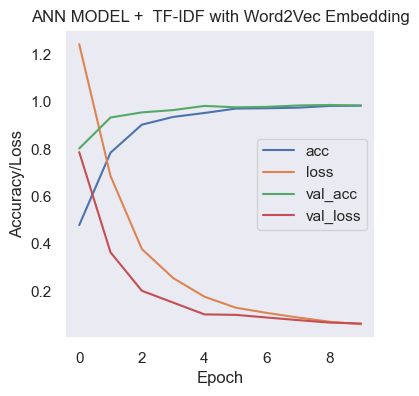

In [146]:
plot_metric_graph(ann_tfidfed_model, 'ANN MODEL +  TF-IDF with Word2Vec Embedding')

In [147]:
from sklearn import metrics
# import numpy as np

result = ann_tfidfed_model.predict(tfidfed_X_test)
prediction = [np.argmax(res) for res in result]

class_report = metrics.classification_report(tfidfed_y_test, prediction)
print(class_report)


ann_tfidfed_result = {
    'accuracy':accuracy_score(tfidfed_y_test, prediction), 
    'precision':precision_score(tfidfed_y_test, prediction, average='weighted'),
    'recall': recall_score(tfidfed_y_test, prediction,  average='weighted'), 
    'f1-score': f1_score(tfidfed_y_test, prediction,  average='weighted')
}



ann_tfidfed_df = pd.DataFrame(pd.Series(ann_tfidfed_result))
ann_tfidfed_df

16/16 [==============================] - 1s 14ms/step
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       102
           1       0.99      0.99      0.99       102
           2       0.99      0.98      0.99       102
           3       0.99      1.00      1.00       103
           4       0.96      0.99      0.98       102

    accuracy                           0.98       511
   macro avg       0.98      0.98      0.98       511
weighted avg       0.98      0.98      0.98       511



,0
accuracy,0.984344
precision,0.984508
recall,0.984344
f1-score,0.984333


### LDA + TFIDF + LSTM

In [83]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer()
X = tfidf.fit_transform(documents)

lsa = TruncatedSVD(n_components=100)  # Reduce to 2 latent topics
X_lsa = lsa.fit_transform(X)
# print(X_lsa)  # Reduced feature matrix
X_lsa

array([[ 2.45849824e-01, -1.26027052e-01, -1.43189710e-01, ...,
         3.56809592e-03,  2.07506501e-02, -8.16151596e-03],
       [ 1.31322590e-01,  5.04366455e-02, -1.12060936e-02, ...,
         2.23751762e-02, -6.57760530e-04, -6.62181042e-03],
       [ 1.46332860e-01, -4.41676390e-02,  8.47477150e-03, ...,
         4.46705390e-03, -5.63166749e-02,  1.42019338e-04],
       ...,
       [ 1.56949243e-01, -1.00542754e-01,  1.49524845e-01, ...,
         4.55340434e-02,  2.36255432e-02,  3.35637044e-02],
       [ 1.98578280e-01, -7.95605298e-02,  3.71875492e-02, ...,
         8.39860842e-04,  1.91094191e-02, -4.33635576e-02],
       [ 2.21510376e-01, -1.78323628e-01,  1.61945775e-01, ...,
        -5.67839631e-02, -4.19439941e-02,  6.02856494e-03]])

In [84]:
X_lsa.shape

(2555, 100)

In [87]:
lsa_X_train, lsa_X_test, lsa_y_train, lsa_y_test = train_test_split(X_lsa, y, test_size=0.2, stratify=y, random_state=42) 

In [148]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the ANN model
ann_lsa_model = Sequential([
    Dense(64, activation='relu', input_shape=(100,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(5, activation='sigmoid') 
])

# Compile the model
ann_lsa_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
ann_lsa_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 64)                6464      
                                                                 
 dense_68 (Dense)            (None, 32)                2080      
                                                                 
 dense_69 (Dense)            (None, 16)                528       
                                                                 
 dense_70 (Dense)            (None, 5)                 85        
                                                                 
Total params: 9,157
Trainable params: 9,157
Non-trainable params: 0
_________________________________________________________________


In [149]:
ann_lsa_model.fit(lsa_X_train, lsa_y_train , validation_data=(lsa_X_test, lsa_y_test) , epochs=10)

Epoch 1/10
64/64 [==============================] - 2s 18ms/step - loss: 1.5394 - accuracy: 0.3748 - val_loss: 1.4163 - val_accuracy: 0.5558
Epoch 2/10
64/64 [==============================] - 0s 8ms/step - loss: 1.1187 - accuracy: 0.7769 - val_loss: 0.7706 - val_accuracy: 0.9256
Epoch 3/10
64/64 [==============================] - 2s 31ms/step - loss: 0.4348 - accuracy: 0.9633 - val_loss: 0.2480 - val_accuracy: 0.9648
Epoch 4/10
64/64 [==============================] - 1s 13ms/step - loss: 0.1555 - accuracy: 0.9711 - val_loss: 0.1463 - val_accuracy: 0.9667
Epoch 5/10
64/64 [==============================] - 1s 8ms/step - loss: 0.0969 - accuracy: 0.9746 - val_loss: 0.1051 - val_accuracy: 0.9706
Epoch 6/10
64/64 [==============================] - 1s 18ms/step - loss: 0.0781 - accuracy: 0.9804 - val_loss: 0.1021 - val_accuracy: 0.9706
Epoch 7/10
64/64 [==============================] - 1s 9ms/step - loss: 0.0666 - accuracy: 0.9824 - val_loss: 0.0808 - val_accuracy: 0.9785
Epoch 8/10
64/64

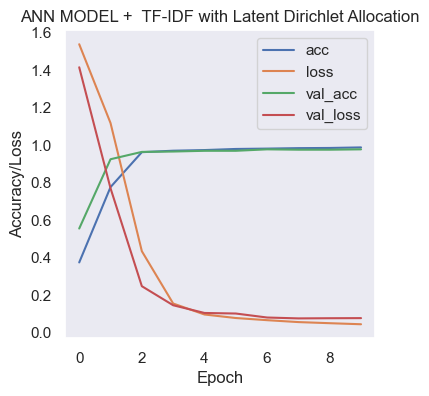

In [150]:
# ploty graph 
def plot_metric_graph(model, title):
    acc  = model.history.history['accuracy']
    loss = model.history.history['loss']
    val_acc  = model.history.history['val_accuracy']
    val_loss = model.history.history['val_loss']
    plt.figure(figsize=(4,4))
    plt.plot(acc)
    plt.plot(loss)
    plt.plot(val_acc)
    plt.plot(val_loss)
    plt.legend(labels=['acc', 'loss', 'val_acc', 'val_loss'])
    plt.ylabel('Accuracy/Loss')
    plt.xlabel('Epoch')
    plt.title(title)
    plt.grid()
    plt.show()
   
plot_metric_graph(ann_lsa_model, 'ANN MODEL +  TF-IDF with Latent Dirichlet Allocation')

In [151]:
# classification report and metrics
from sklearn import metrics
# import numpy as np

result = ann_lsa_model.predict(lsa_X_test)
prediction = [np.argmax(res) for res in result]

class_report = metrics.classification_report(lsa_y_test, prediction)
print(class_report)

ann_lsa_result = {
    'accuracy':accuracy_score(lsa_y_test, prediction), 
    'precision':precision_score(lsa_y_test, prediction, average='weighted'),
    'recall': recall_score(lsa_y_test, prediction,  average='weighted'), 
    'f1-score': f1_score(lsa_y_test, prediction,  average='weighted')
}



ann_lsa_df = pd.DataFrame(pd.Series(ann_lsa_result))
ann_lsa_df

16/16 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       102
           1       0.97      1.00      0.99       102
           2       0.97      0.98      0.98       102
           3       0.99      0.99      0.99       103
           4       1.00      0.97      0.99       102

    accuracy                           0.98       511
   macro avg       0.98      0.98      0.98       511
weighted avg       0.98      0.98      0.98       511



,0
accuracy,0.978474
precision,0.978621
recall,0.978474
f1-score,0.978453


### TFID + RBM + LSTM

In [153]:
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline

In [154]:
tfidf_matrix.toarray()

array([[0.        , 0.01929646, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02341527, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0371215 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00443929, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [93]:
rbm_1 = BernoulliRBM(n_components=500, learning_rate=0.1, n_iter=1, verbose=True)
X1 = rbm_1.fit_transform(tfidf_matrix)

# Layer 2 RBM
rbm_2 = BernoulliRBM(n_components=500)
X2 = rbm_2.fit_transform(X1)
X2

[BernoulliRBM] Iteration 1, pseudo-likelihood = -5.84, time = 167.39s


array([[7.05094843e-18, 2.72928663e-16, 2.18729373e-19, ...,
        1.53094415e-17, 3.33099997e-19, 1.02241937e-16],
       [7.05094837e-18, 2.72928661e-16, 2.18729371e-19, ...,
        1.53094414e-17, 3.33099994e-19, 1.02241936e-16],
       [7.05094834e-18, 2.72928660e-16, 2.18729370e-19, ...,
        1.53094413e-17, 3.33099993e-19, 1.02241936e-16],
       ...,
       [7.05094835e-18, 2.72928660e-16, 2.18729370e-19, ...,
        1.53094414e-17, 3.33099994e-19, 1.02241936e-16],
       [7.05094841e-18, 2.72928662e-16, 2.18729372e-19, ...,
        1.53094415e-17, 3.33099996e-19, 1.02241937e-16],
       [7.05094844e-18, 2.72928663e-16, 2.18729373e-19, ...,
        1.53094415e-17, 3.33099998e-19, 1.02241937e-16]])

In [94]:
X2.shape

(2555, 500)

In [95]:
tfidf_RBM_X_train, tfidf_RBM_X_test, tfidf_RBM_y_train, tfidf_RBM_y_test = train_test_split(X2, y , test_size=0.2, stratify=y, random_state=42)
tfidf_RBM_X_train.shape

(2044, 500)

In [155]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the ANN model
ann_tfidf_rbm_model = Sequential([
    Dense(64, activation='relu', input_shape=(500,)),
    Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(5, activation='sigmoid')  # 5-class output
])

# Compile the model
ann_tfidf_rbm_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
ann_tfidf_rbm_model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 64)                32064     
                                                                 
 dense_72 (Dense)            (None, 32)                2080      
                                                                 
 dropout_16 (Dropout)        (None, 32)                0         
                                                                 
 dense_73 (Dense)            (None, 16)                528       
                                                                 
 dense_74 (Dense)            (None, 5)                 85        
                                                                 
Total params: 34,757
Trainable params: 34,757
Non-trainable params: 0
_________________________________________________________________


In [156]:
ann_tfidf_rbm_model.fit(tfidf_RBM_X_train, tfidf_RBM_y_train,validation_data=(tfidf_RBM_X_test, tfidf_RBM_y_test) , epochs=10)

Epoch 1/10
64/64 [==============================] - 3s 23ms/step - loss: 1.6099 - accuracy: 0.1835 - val_loss: 1.6095 - val_accuracy: 0.1996
Epoch 2/10
64/64 [==============================] - 1s 10ms/step - loss: 1.6096 - accuracy: 0.1937 - val_loss: 1.6094 - val_accuracy: 0.1996
Epoch 3/10
64/64 [==============================] - 0s 6ms/step - loss: 1.6096 - accuracy: 0.1771 - val_loss: 1.6094 - val_accuracy: 0.1996
Epoch 4/10
64/64 [==============================] - 0s 6ms/step - loss: 1.6097 - accuracy: 0.1913 - val_loss: 1.6095 - val_accuracy: 0.1996
Epoch 5/10
64/64 [==============================] - 0s 6ms/step - loss: 1.6095 - accuracy: 0.1835 - val_loss: 1.6094 - val_accuracy: 0.1996
Epoch 6/10
64/64 [==============================] - 0s 7ms/step - loss: 1.6097 - accuracy: 0.1820 - val_loss: 1.6095 - val_accuracy: 0.1996
Epoch 7/10
64/64 [==============================] - 0s 6ms/step - loss: 1.6096 - accuracy: 0.1967 - val_loss: 1.6094 - val_accuracy: 0.1996
Epoch 8/10
64/64 [

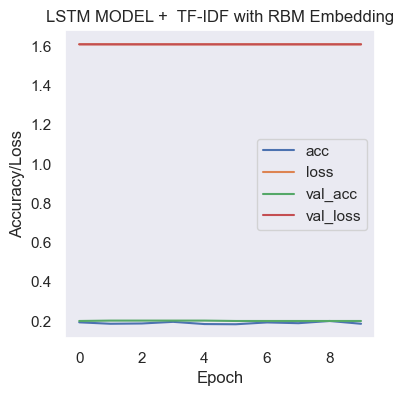

In [ ]:
plot_metric_graph(ann_tfidf_rbm_model, 'LSTM MODEL +  TF-IDF with RBM Embedding')

In [157]:
# classification report and metrics
from sklearn import metrics
# import numpy as np

result = lstm_tfidf_rbm_model.predict(tfidf_RBM_X_test)
prediction = [np.argmax(res) for res in result]

class_report = metrics.classification_report(tfidf_RBM_y_test, prediction)
print(class_report)

ann_RBM_result = {
    'accuracy':accuracy_score(tfidf_RBM_y_test, prediction), 
    'precision':precision_score(tfidf_RBM_y_test, prediction, average='weighted'),
    'recall': recall_score(tfidf_RBM_y_test, prediction,  average='weighted'), 
    'f1-score': f1_score(tfidf_RBM_y_test, prediction,  average='weighted')
}



ann_RBM_df = pd.DataFrame(pd.Series(ann_RBM_result))
ann_RBM_df

16/16 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       102
           1       0.20      1.00      0.33       102
           2       0.00      0.00      0.00       102
           3       0.00      0.00      0.00       103
           4       0.00      0.00      0.00       102

    accuracy                           0.20       511
   macro avg       0.04      0.20      0.07       511
weighted avg       0.04      0.20      0.07       511



c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

,0
accuracy,0.199609
precision,0.039844
recall,0.199609
f1-score,0.066428


In [100]:
# documents
# tokenized_docs

## FINE TURN TFIDF + SVD + LSTM 

In [101]:
tfid_ngrams = TfidfVectorizer(sublinear_tf=True)
tfidngram_vec = tfid_ngrams.fit_transform(documents)

In [102]:
# reduce dimension... 
dim = 100
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=dim)
reduced_tfidf = svd.fit_transform(tfidngram_vec.toarray())

In [103]:
reduced_tfidf

array([[ 0.25921755, -0.09659757,  0.157051  , ...,  0.03063611,
         0.03205403,  0.0163092 ],
       [ 0.1369563 ,  0.01512838,  0.01301752, ..., -0.01421522,
         0.01273157, -0.03065116],
       [ 0.18382269, -0.04035289, -0.08903336, ...,  0.00899314,
        -0.02000847,  0.01671887],
       ...,
       [ 0.17086342, -0.0873341 , -0.12501221, ..., -0.00893266,
        -0.05071906, -0.04522696],
       [ 0.22579859, -0.07069774, -0.06359292, ..., -0.07364674,
        -0.02940083, -0.01396404],
       [ 0.30536805, -0.13648939, -0.11477814, ...,  0.02923279,
        -0.03388669, -0.02488585]])

In [105]:
f_tfidf_X_train, f_tfidf_X_test, f_tfidf_y_train, f_tfidf_y_test = train_test_split(reduced_tfidf, y , test_size=0.2, stratify=y, random_state=42)

In [106]:
f_tfidf_X_train.shape

(2044, 100)

In [107]:
y.sample(5)

1767    3
842     1
1572    0
756     4
246     1
Name: lbl, dtype: int8

In [158]:
# LSTM TFIDF... 

# TF-IDF WITH WORD2VEC....
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define input shape
# input_shape = (X_train.shape[1],)  # Number of features

# Build the ANN model
ann_fine_tfidf_model = Sequential([
    Dense(64, activation='relu', input_shape=(dim,)),
    Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(5, activation='sigmoid') 
])

# Compile the model
ann_fine_tfidf_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
ann_fine_tfidf_model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 64)                6464      
                                                                 
 dense_76 (Dense)            (None, 32)                2080      
                                                                 
 dropout_17 (Dropout)        (None, 32)                0         
                                                                 
 dense_77 (Dense)            (None, 16)                528       
                                                                 
 dense_78 (Dense)            (None, 5)                 85        
                                                                 
Total params: 9,157
Trainable params: 9,157
Non-trainable params: 0
_________________________________________________________________


In [168]:
ann_fine_tfidf_model.fit(f_tfidf_X_train, f_tfidf_y_train,validation_data=(f_tfidf_X_test, f_tfidf_y_test) , epochs=10)

Epoch 1/10
64/64 [==============================] - 2s 12ms/step - loss: 1.5788 - accuracy: 0.3146 - val_loss: 1.5034 - val_accuracy: 0.4892
Epoch 2/10
64/64 [==============================] - 0s 5ms/step - loss: 1.3618 - accuracy: 0.5000 - val_loss: 1.0664 - val_accuracy: 0.8415
Epoch 3/10
64/64 [==============================] - 0s 4ms/step - loss: 0.8747 - accuracy: 0.7661 - val_loss: 0.4781 - val_accuracy: 0.9687
Epoch 4/10
64/64 [==============================] - 0s 3ms/step - loss: 0.4617 - accuracy: 0.8904 - val_loss: 0.1929 - val_accuracy: 0.9765
Epoch 5/10
64/64 [==============================] - 0s 4ms/step - loss: 0.2863 - accuracy: 0.9344 - val_loss: 0.1143 - val_accuracy: 0.9804
Epoch 6/10
64/64 [==============================] - 1s 11ms/step - loss: 0.2075 - accuracy: 0.9457 - val_loss: 0.0824 - val_accuracy: 0.9804
Epoch 7/10
64/64 [==============================] - 0s 7ms/step - loss: 0.1744 - accuracy: 0.9501 - val_loss: 0.0756 - val_accuracy: 0.9843
Epoch 8/10
64/64 [

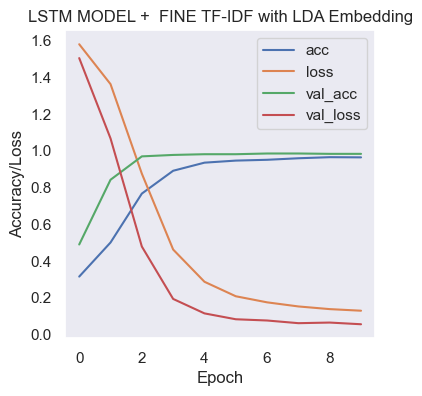

In [169]:
plot_metric_graph(ann_fine_tfidf_model, 'LSTM MODEL +  FINE TF-IDF with LDA Embedding')

In [170]:
# classification report and metrics
from sklearn import metrics
# import numpy as np

result = ann_fine_tfidf_model.predict(f_tfidf_X_test)
prediction = [np.argmax(res) for res in result]

class_report = metrics.classification_report(f_tfidf_y_test, prediction)
print(class_report)

ann_f_tfidf_result = {
    'accuracy':accuracy_score(f_tfidf_y_test, prediction), 
    'precision':precision_score(f_tfidf_y_test, prediction, average='weighted'),
    'recall': recall_score(f_tfidf_y_test, prediction,  average='weighted'), 
    'f1-score': f1_score(f_tfidf_y_test, prediction,  average='weighted')
}

ann_f_tfidf_df = pd.DataFrame(pd.Series(ann_f_tfidf_result))
ann_f_tfidf_df

16/16 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       102
           1       0.98      1.00      0.99       102
           2       0.98      0.97      0.98       102
           3       0.99      1.00      1.00       103
           4       0.97      0.98      0.98       102

    accuracy                           0.98       511
   macro avg       0.98      0.98      0.98       511
weighted avg       0.98      0.98      0.98       511



,0
accuracy,0.982387
precision,0.982441
recall,0.982387
f1-score,0.982338


### BM25  + TF-IDF for retrieval tasks.


In [131]:
!pip install rank-bm25


[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [113]:
from rank_bm25 import BM25Okapi
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def hybrid_bm25_tfidf_features(corpus, alpha=0.5):
    # BM25 tokenization
    tokenized_corpus = [doc.lower().split() for doc in corpus]
    bm25 = BM25Okapi(tokenized_corpus)

    # TF-IDF matrix
    tfidf = TfidfVectorizer()
    tfidf_matrix = tfidf.fit_transform(corpus)

    # Scaler
    scaler = MinMaxScaler()

    # Store features for each document
    all_features = []

    for idx, doc in enumerate(corpus):
        # BM25 scores of current doc against all docs
        bm25_scores = np.array(bm25.get_scores(tokenized_corpus[idx])).reshape(-1, 1)
        bm25_norm = scaler.fit_transform(bm25_scores)

        # TF-IDF cosine similarity for current doc
        doc_vec = tfidf_matrix[idx]
        cosine_scores = (tfidf_matrix @ doc_vec.T).toarray().reshape(-1, 1)
        tfidf_norm = scaler.fit_transform(cosine_scores)

        # Hybrid score
        hybrid_scores = alpha * bm25_norm + (1 - alpha) * tfidf_norm
        all_features.append(hybrid_scores.flatten())

    return np.array(all_features)


# Example usage
corpus = [
    "The cat sat on the mat",
    "The dog chased the cat",
    "The cat climbed the tree",
    "Dogs and cats are great pets"
]

features = hybrid_bm25_tfidf_features(corpus, alpha=0.6)
print("Feature matrix shape:", features.shape)
print(features)


Feature matrix shape: (4, 4)
[[1.         0.30360255 0.30360255 0.        ]
 [0.32665698 1.         0.35752873 0.        ]
 [0.32665698 0.35752873 1.         0.        ]
 [0.         0.         0.         1.        ]]


In [114]:
documents

0      tv future hand viewer home theatre system plas...
1      worldcom bos left book alone former worldcom b...
2      tiger wary farrell gamble leicester say rushed...
3      yeading face newcastle fa cup premiership side...
4      ocean twelve raid box office ocean twelve crim...
                             ...                        
120    memory marley mark 60th anniversary birth regg...
121    comic book genius stan lee stan lee man respon...
122    belle named best scottish band belle sebastian...
123    dance music dead say fatboy dj norman cook aka...
124    scissor sister triumph brit u band scissor sis...
Name: documents, Length: 2555, dtype: object

In [160]:
features = hybrid_bm25_tfidf_features(documents, alpha=0.6)
print("Feature matrix shape:", features.shape)
print(features)

Feature matrix shape: (2555, 2555)
[[1.         0.01821282 0.02659904 ... 0.02577539 0.06514486 0.06891353]
 [0.02641418 1.         0.02939304 ... 0.01183326 0.02063155 0.01663891]
 [0.03568257 0.03331024 1.         ... 0.04469168 0.05136532 0.06077058]
 ...
 [0.0279432  0.01065214 0.03831598 ... 1.         0.10042021 0.2093083 ]
 [0.0563689  0.01498212 0.04017852 ... 0.08892902 1.         0.14431103]
 [0.06110788 0.01123644 0.04578071 ... 0.24758176 0.19258869 1.        ]]


In [ ]:
y.shape

(2555,)

In [185]:
bm25_tfidf_X_train, bm25_tfidf_X_test, bm25_tfidf_y_train, bm25_tfidf_y_test = train_test_split(features, y , test_size=0.2, stratify=y, random_state=42)

In [186]:
# LSTM TFIDF... 

# TF-IDF WITH WORD2VEC....
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Build the ANN model
ann_tfidfBM_model = Sequential([
    Dense(64, activation='relu', input_shape=(2555,)),
    Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(5, activation='sigmoid') 
])

# Compile the model
ann_tfidfBM_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
ann_tfidfBM_model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_95 (Dense)            (None, 64)                163584    
                                                                 
 dense_96 (Dense)            (None, 32)                2080      
                                                                 
 dropout_22 (Dropout)        (None, 32)                0         
                                                                 
 dense_97 (Dense)            (None, 16)                528       
                                                                 
 dense_98 (Dense)            (None, 5)                 85        
                                                                 
Total params: 166,277
Trainable params: 166,277
Non-trainable params: 0
_________________________________________________________________


In [187]:
ann_tfidfBM_model.fit(bm25_tfidf_X_train, bm25_tfidf_y_train,validation_data=(bm25_tfidf_X_test, bm25_tfidf_y_test) , epochs=10)

Epoch 1/10
64/64 [==============================] - 3s 19ms/step - loss: 1.1460 - accuracy: 0.5660 - val_loss: 0.5467 - val_accuracy: 0.9491
Epoch 2/10
64/64 [==============================] - 1s 10ms/step - loss: 0.4793 - accuracy: 0.8821 - val_loss: 0.1622 - val_accuracy: 0.9706
Epoch 3/10
64/64 [==============================] - 1s 8ms/step - loss: 0.2759 - accuracy: 0.9295 - val_loss: 0.1037 - val_accuracy: 0.9765
Epoch 4/10
64/64 [==============================] - 0s 6ms/step - loss: 0.1980 - accuracy: 0.9413 - val_loss: 0.0849 - val_accuracy: 0.9726
Epoch 5/10
64/64 [==============================] - 0s 7ms/step - loss: 0.1693 - accuracy: 0.9525 - val_loss: 0.0651 - val_accuracy: 0.9843
Epoch 6/10
64/64 [==============================] - 0s 7ms/step - loss: 0.1592 - accuracy: 0.9545 - val_loss: 0.0651 - val_accuracy: 0.9843
Epoch 7/10
64/64 [==============================] - 0s 5ms/step - loss: 0.1495 - accuracy: 0.9569 - val_loss: 0.0469 - val_accuracy: 0.9922
Epoch 8/10
64/64 [

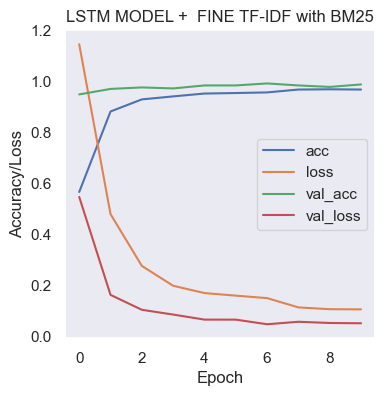

In [188]:
plot_metric_graph(ann_tfidfBM_model, 'LSTM MODEL +  FINE TF-IDF with BM25')

In [189]:
# classification report and metrics
from sklearn import metrics
# import numpy as np

result = ann_tfidfBM_model.predict(bm25_tfidf_X_test)
prediction = [np.argmax(res) for res in result]

class_report = metrics.classification_report(bm25_tfidf_y_test, prediction)
print(class_report)

ann_bm25_result = {
    'accuracy':accuracy_score(bm25_tfidf_y_test, prediction), 
    'precision':precision_score(bm25_tfidf_y_test, prediction, average='weighted'),
    'recall': recall_score(bm25_tfidf_y_test, prediction,  average='weighted'), 
    'f1-score': f1_score(bm25_tfidf_y_test, prediction,  average='weighted')
}

ann_bm25_df = pd.DataFrame(pd.Series(ann_bm25_result))
ann_bm25_df


16/16 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       102
           1       0.98      1.00      0.99       102
           2       0.97      1.00      0.99       102
           3       1.00      1.00      1.00       103
           4       1.00      0.97      0.99       102

    accuracy                           0.99       511
   macro avg       0.99      0.99      0.99       511
weighted avg       0.99      0.99      0.99       511



,0
accuracy,0.988258
precision,0.988462
recall,0.988258
f1-score,0.988237


In [ ]:
# // build lstm..

In [ ]:
  # shape (samples, features, 1)

In [ ]:
tfidfed_X_train, tfidfed_X_test, tfidfed_y_train, tfidfed_y_test = train_test_split(feature_table.to_numpy(), y, test_size=0.2, stratify=y, random_state=42)

In [192]:
Xtrain_tfidfed_3d = np.expand_dims(tfidfed_X_train, axis=2)
Xtest_tfidfed_3d = np.expand_dims(tfidfed_X_test, axis=2)

print(Xtrain_tfidfed_3d.shape)
print(Xtest_tfidfed_3d.shape)

(2044, 29899, 1)
(511, 29899, 1)


In [ ]:
# Fit the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

input_shape = (Xtrain_tfidfed_3d.shape[1], Xtrain_tfidfed_3d.shape[2])  # (timesteps, features)

model = Sequential([
    LSTM(64, input_shape=input_shape),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 64)                16896     
                                                                 
 dropout_23 (Dropout)        (None, 64)                0         
                                                                 
 dense_99 (Dense)            (None, 32)                2080      
                                                                 
 dense_100 (Dense)           (None, 5)                 165       
                                                                 
Total params: 19,141
Trainable params: 19,141
Non-trainable params: 0
_________________________________________________________________


In [195]:
model.fit(Xtrain_tfidfed_3d, tfidfed_y_train, validation_data=(Xtest_tfidfed_3d, tfidfed_y_test), epochs=10)

Epoch 1/10
43/64 [===================>..........] - ETA: 30:32 - loss: 1.5971 - accuracy: 0.2696

KeyboardInterrupt: 